In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

# Checking Unique Values

In [3]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [4]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [5]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# Data Cleaning

In [7]:
df.Additional_Info=df.Additional_Info.replace('No Info','No info')

In [8]:
df.drop(columns=['Route'],inplace=True)

In [9]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [10]:
#df.drop(columns=['Date_of_Journey'],inplace=True)

In [11]:
df.Destination.replace('New Delhi','Delhi',inplace=True)

In [12]:
df.replace('Delhi',1,inplace=True)
df.replace('Banglore',2,inplace=True)
df.replace('Cochin',3,inplace=True)
df.replace('Kolkata',4,inplace=True)
df.replace('Hyderabad',5,inplace=True)
df.replace('Chennai',6,inplace=True)
df.replace('Hyderabad',7,inplace=True)

In [13]:
df.replace('Mumbai',8,inplace=True)

In [14]:
df.Destination.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [15]:
df.Source.unique()

array([2, 4, 1, 6, 8], dtype=int64)

In [16]:
df.Total_Stops.isnull().sum()

1

In [17]:
df.dropna(inplace=True)

In [18]:
df.Total_Stops.replace('non-stop','0 stop',inplace=True)

In [19]:
df.Total_Stops=df.Total_Stops.apply(lambda x: int(x.split(' ')[0]))

# Creating Dummy Variables

In [20]:
df = pd.get_dummies(df, columns=['Total_Stops'],drop_first=True)
#TS_dummy=pd.get_dummies(df.Total_Stops,prefix="Total_Stops")
#TS_dummy

In [21]:
df = pd.get_dummies(df, columns=['Source'],drop_first=True)
df = pd.get_dummies(df, columns=['Destination'],drop_first=True)

In [22]:
df = pd.get_dummies(df, columns=['Additional_Info'],drop_first=True)


In [23]:
h = df['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = df['Duration'].str.extract('(\d+)m', expand=False).astype(float)
df['Duration'] = h.add(m, fill_value=0).astype(int)

In [24]:
df.Duration=df.Duration.astype(float)

In [25]:
df.Price=df.Price.astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline                                       10682 non-null  object 
 1   Date_of_Journey                               10682 non-null  object 
 2   Duration                                      10682 non-null  float64
 3   Price                                         10682 non-null  float64
 4   Total_Stops_1                                 10682 non-null  uint8  
 5   Total_Stops_2                                 10682 non-null  uint8  
 6   Total_Stops_3                                 10682 non-null  uint8  
 7   Total_Stops_4                                 10682 non-null  uint8  
 8   Source_2                                      10682 non-null  uint8  
 9   Source_4                                      10682 non-null 

In [27]:
df.Date_of_Journey=df.Date_of_Journey.astype('datetime64[ns]')

In [28]:
df

Airline Date_of_Journey  Duration    Price  Total_Stops_1  \
0           IndiGo      2019-03-24     170.0   3897.0              0   
1        Air India      2019-01-05     445.0   7662.0              0   
2      Jet Airways      2019-09-06    1140.0  13882.0              0   
3           IndiGo      2019-12-05     325.0   6218.0              1   
4           IndiGo      2019-01-03     285.0  13302.0              1   
...            ...             ...       ...      ...            ...   
10678     Air Asia      2019-09-04     150.0   4107.0              0   
10679    Air India      2019-04-27     155.0   4145.0              0   
10680  Jet Airways      2019-04-27     180.0   7229.0              0   
10681      Vistara      2019-01-03     160.0  12648.0              0   
10682    Air India      2019-09-05     500.0  11753.0              0   

       Total_Stops_2  Total_Stops_3  Total_Stops_4  Source_2  Source_4  ...  \
0                  0              0              0         1         0  ...   
1                  1              0              0         0         1  ...   
2                  1              0              0         0         0  ...   
3                  0              0              0         0         1  ...   
4                  0              0              0         1         0  ...   
...              ...            ...            ...       ...       ...  ...   
10678              0              0              0         0         1  ...   
10679              0              0              0         0         1  ...   
10680              0              0              0         1         0  ...   
10681              0              0              0         1         0  ...   
10682              1              0              0         0         0  ...   

       Destination_4  Destination_5  Additional_Info_1 Short layover  \
0                  0              0                                0   
1                  0              0                                0   
2                  0              0                                0   
3                  0              0                                0   
4                  0              0                                0   
...              ...            ...                              ...   
10678              0              0                                0   
10679              0              0                                0   
10680              0              0                                0   
10681              0              0                                0   
10682              0              0                                0   

       Additional_Info_2 Long layover  Additional_Info_Business class  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   
...                               ...                             ...   
10678                               0                               0   
10679                               0                               0   
10680                               0                               0   
10681                               0                               0   
10682                               0                               0   

       Additional_Info_Change airports  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
...                                ...   
10678                                0   
10679                                0   
10680                                0   
10681                              

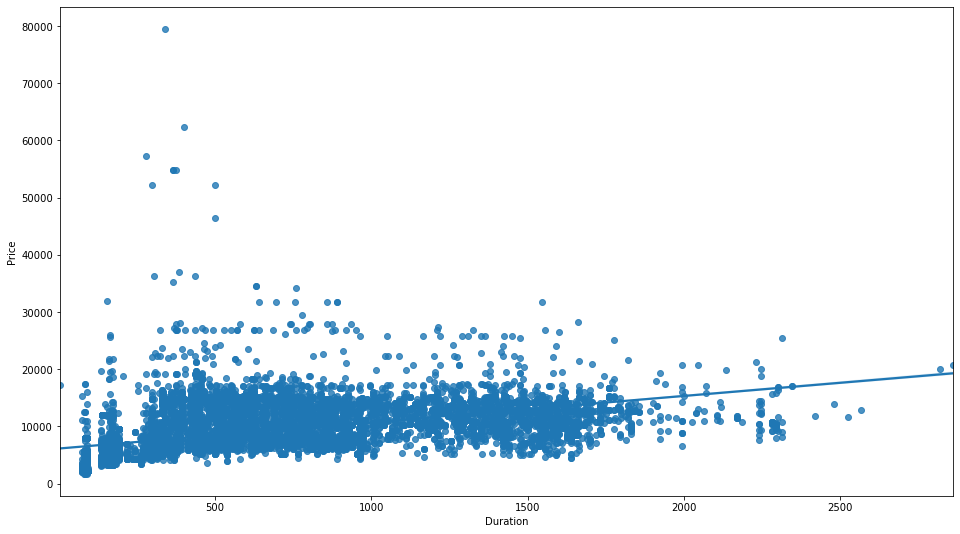

In [29]:
plt.figure(figsize= (16,9))
sns.regplot(x ="Duration", y ="Price",data = df)

In [30]:
#plt.figure(figsize= (16,9))
#sns.regplot(x ="Total_Stops", y ="Price",data = df)

In [31]:
#df.Duration.values.reshape(-1,1)
#df.Price.values.reshape(-1,1)

In [32]:
#plt.bar(df.Additional_Info,df.Price)
#plt.xticks(rotation=90)
#plt.show()

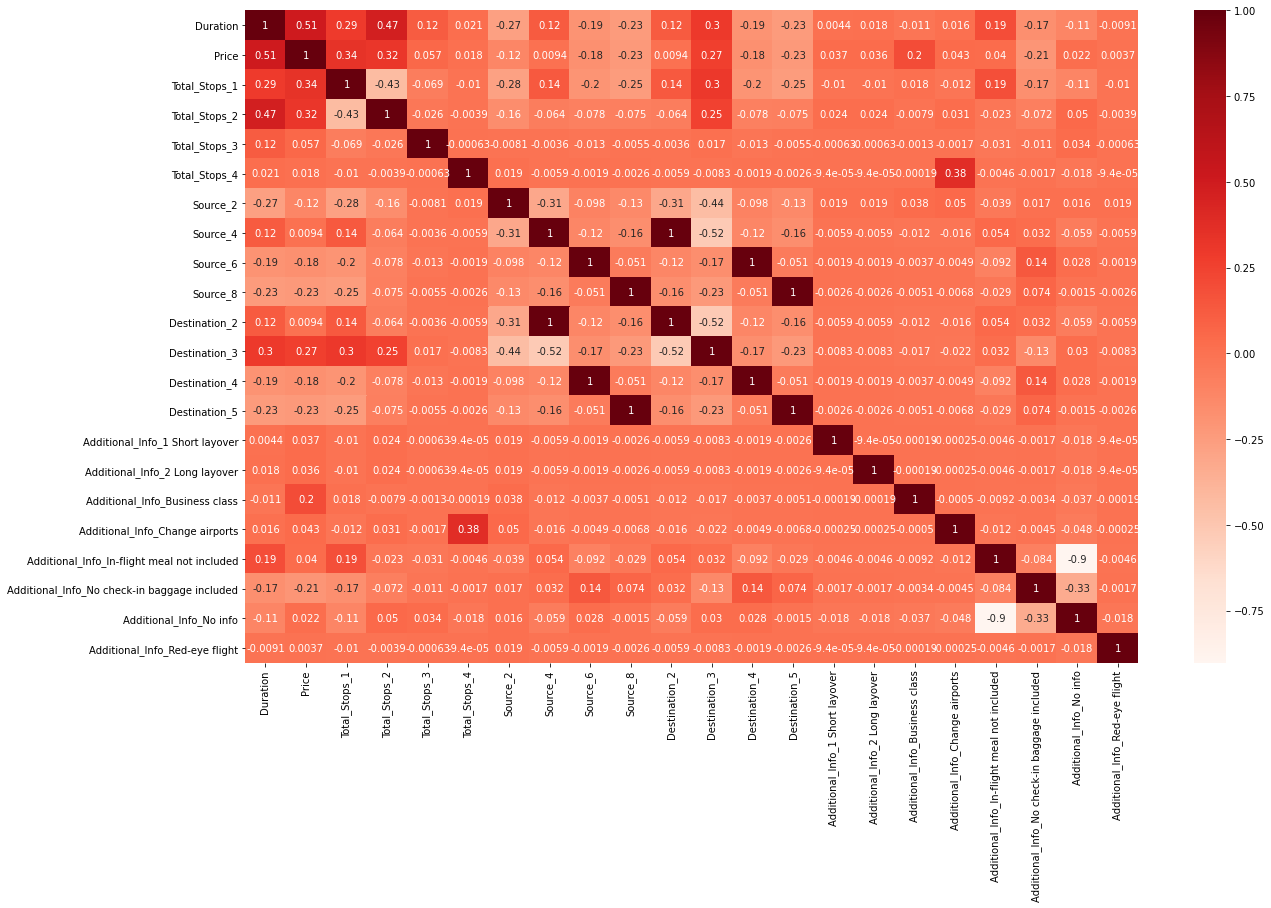

In [33]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Airline                                       10682 non-null  object        
 1   Date_of_Journey                               10682 non-null  datetime64[ns]
 2   Duration                                      10682 non-null  float64       
 3   Price                                         10682 non-null  float64       
 4   Total_Stops_1                                 10682 non-null  uint8         
 5   Total_Stops_2                                 10682 non-null  uint8         
 6   Total_Stops_3                                 10682 non-null  uint8         
 7   Total_Stops_4                                 10682 non-null  uint8         
 8   Source_2                                      10682 non-null  uint

# Feature Selection

In [35]:
df = pd.get_dummies(df, columns=['Airline'],drop_first=True)

In [36]:
X=df
X = X.drop(["Price","Date_of_Journey"],1)
X
#,19,20,21,22,23,24,25,26,27

Duration  Total_Stops_1  Total_Stops_2  Total_Stops_3  Total_Stops_4  \
0         170.0              0              0              0              0   
1         445.0              0              1              0              0   
2        1140.0              0              1              0              0   
3         325.0              1              0              0              0   
4         285.0              1              0              0              0   
...         ...            ...            ...            ...            ...   
10678     150.0              0              0              0              0   
10679     155.0              0              0              0              0   
10680     180.0              0              0              0              0   
10681     160.0              0              0              0              0   
10682     500.0              0              1              0              0   

       Source_2  Source_4  Source_6  Source_8  Destination_2  ...  \
0             1         0         0         0              0  ...   
1             0         1         0         0              1  ...   
2             0         0         0         0              0  ...   
3             0         1         0         0              1  ...   
4             1         0         0         0              0  ...   
...         ...       ...       ...       ...            ...  ...   
10678         0         1         0         0              1  ...   
10679         0         1         0         0              1  ...   
10680         1         0         0         0              0  ...   
10681         1         0         0         0              0  ...   
10682         0         0         0         0              0  ...   

       Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0               1                    0   
1                  0               0                    0   
2                  0               0                    1   
3                  0               1                    0   
4                  0               1                    0   
...              ...             ...                  ...   
10678              0               0                    0   
10679              0               0                    0   
10680              0               0                    1   
10681              0               0                    0   
10682              0               0                    0   

       Airline_Jet Airways Business  Airline_Multiple carriers  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
10678                             0                          0   
10679                             0                          0   
10680                             0                          0   
10681                             0                          0   
10682                             0                          0   

       Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                              0                 0   
1                                              0                 0   
2                                              0                 0   
3                                              0                 0   
4                                              0                 0   
...                                          ...               ...   
10678                                          0                 0   
10679                                          0                 0   
10680                                          0                 0   
106

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [38]:
y = np.log(df.Price)
y

0        8.267962
1        8.944028
2        9.538348
3        8.735204
4        9.495670
           ...   
10678    8.320448
10679    8.329658
10680    8.885856
10681    9.445254
10682    9.371864
Name: Price, Length: 10682, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [40]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
y_pred = regressor.predict(X_test)

In [42]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.79961135896528

In [57]:
import graphviz
from sklearn import tree
import pylab
# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, 
                                feature_names=X.columns,  
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 




In [56]:
graph

In [44]:
from sklearn.metrics import roc_auc_score
# Allow a decision tree to grow to its full depth
clf = DecisionTreeRegressor(random_state = 0)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [r2_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [r2_score(y_test, clf.predict(X_test)) for clf in clfs]



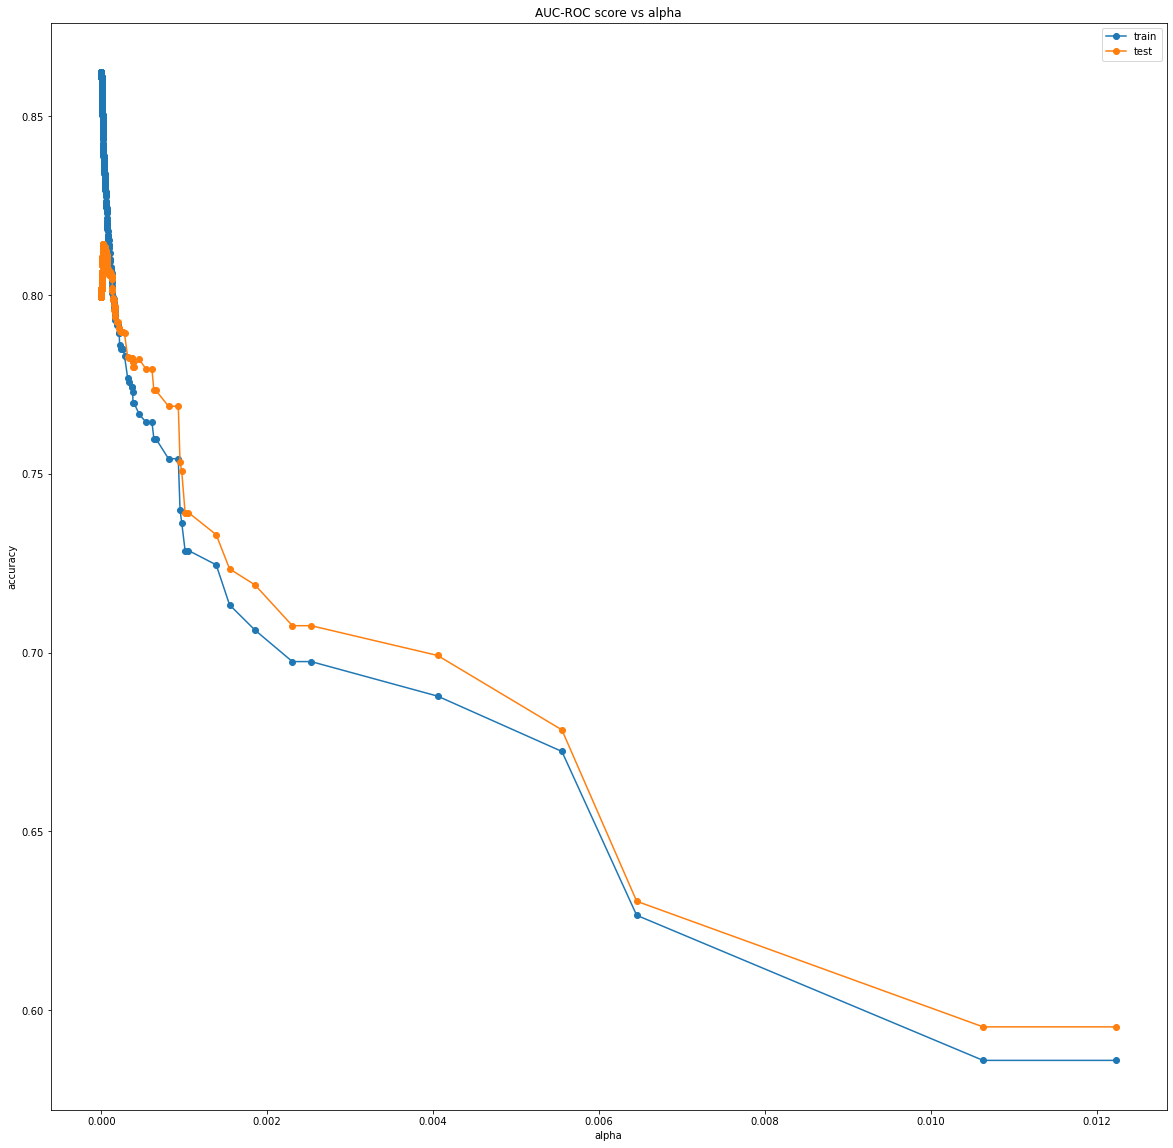

<Figure size 1440x1440 with 0 Axes>

In [45]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.figure(figsize = (20,20))
plt.show()

In [46]:
clf = DecisionTreeRegressor(random_state=42, ccp_alpha=0.00006)
clf.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=6e-05, random_state=42)

In [47]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
r2_score(y_test, pred)

0.8108431323032261

In [60]:
# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, 
                                feature_names=X.columns,  
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 


graph

[Text(1270.589758342923, 2650.05, 'X[0] <= 297.5\nmse = 0.262\nsamples = 7477\nvalue = 8.994'),
 Text(521.3190448791714, 2514.15, 'X[0] <= 137.5\nmse = 0.13\nsamples = 2604\nvalue = 8.48'),
 Text(282.53164556962025, 2378.25, 'X[24] <= 0.5\nmse = 0.199\nsamples = 504\nvalue = 8.202'),
 Text(205.47756041426928, 2242.35, 'X[7] <= 0.5\nmse = 0.174\nsamples = 358\nvalue = 8.084'),
 Text(128.4234752589183, 2106.45, 'X[28] <= 0.5\nmse = 0.173\nsamples = 274\nvalue = 8.004'),
 Text(51.36939010356732, 1970.55, 'X[0] <= 40.0\nmse = 0.16\nsamples = 192\nvalue = 8.113'),
 Text(25.68469505178366, 1834.65, 'mse = 0.0\nsamples = 1\nvalue = 9.76'),
 Text(77.05408515535098, 1834.65, 'X[0] <= 92.5\nmse = 0.146\nsamples = 191\nvalue = 8.105'),
 Text(51.36939010356732, 1698.75, 'X[23] <= 0.5\nmse = 0.146\nsamples = 182\nvalue = 8.123'),
 Text(25.68469505178366, 1562.85, 'mse = 0.124\nsamples = 64\nvalue = 8.073'),
 Text(77.05408515535098, 1562.85, 'X[0] <= 87.5\nmse = 0.157\nsamples = 118\nvalue = 8.15'),

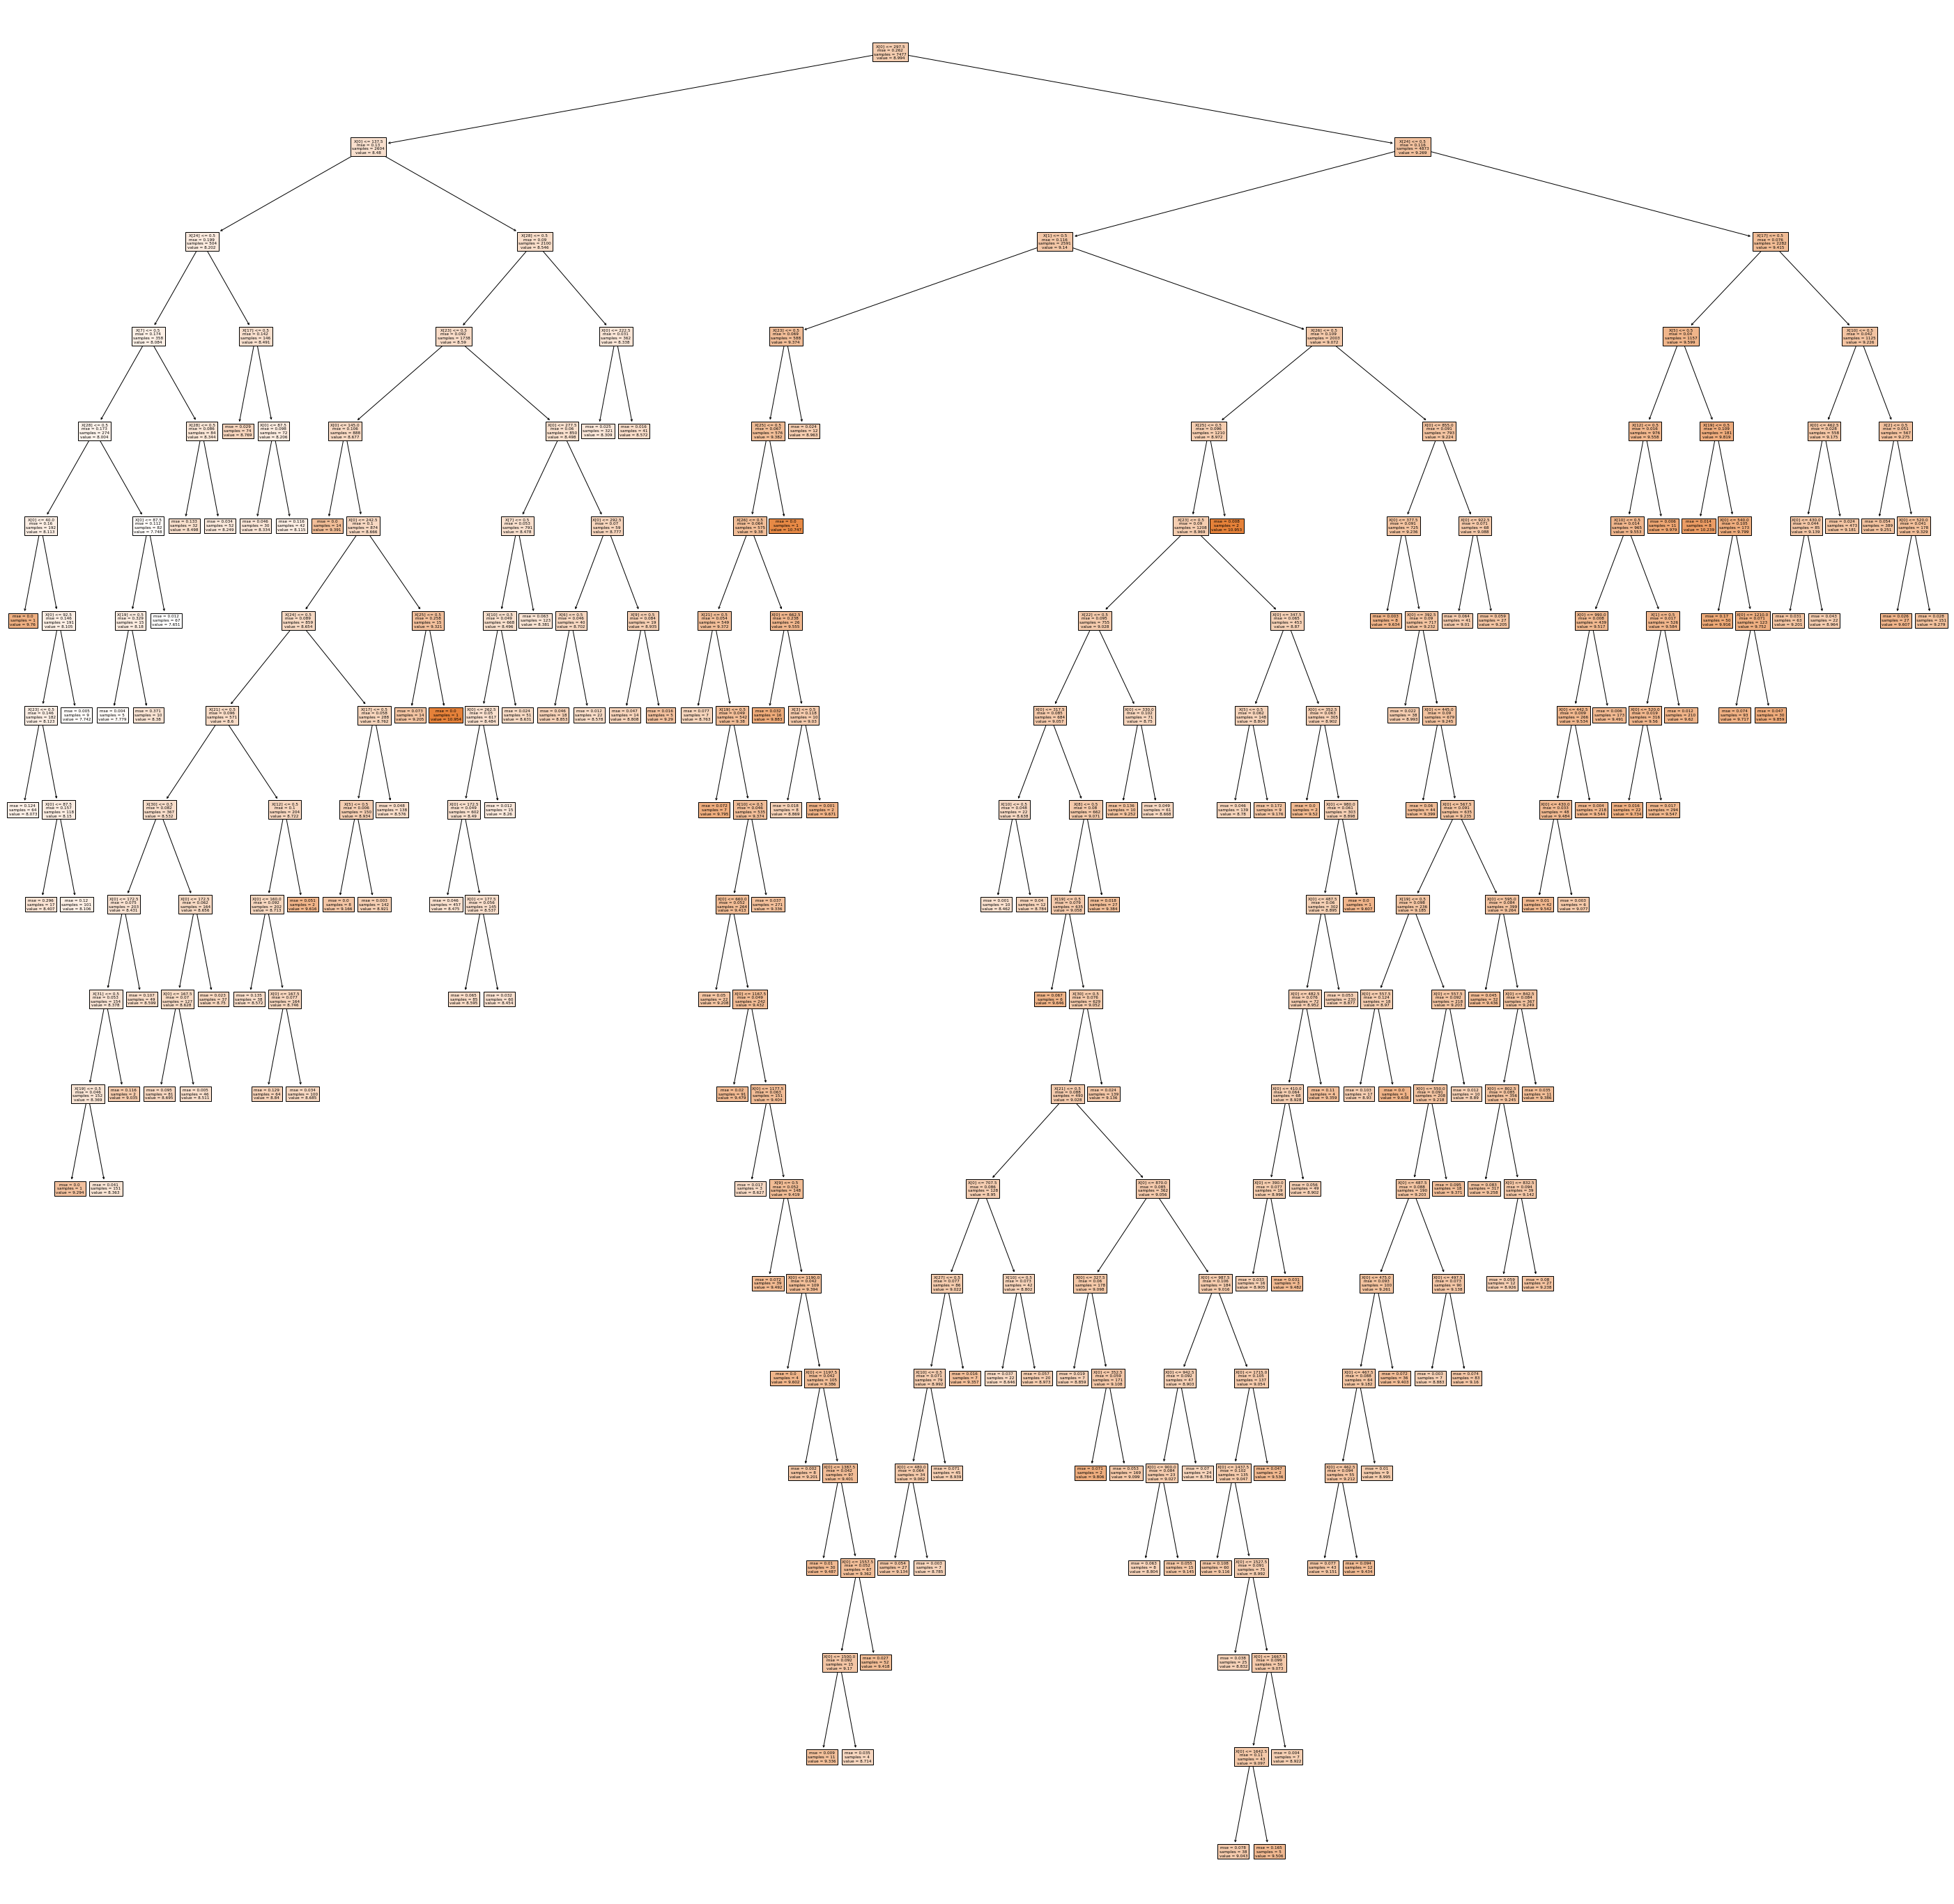

In [63]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(clf,filled=True)

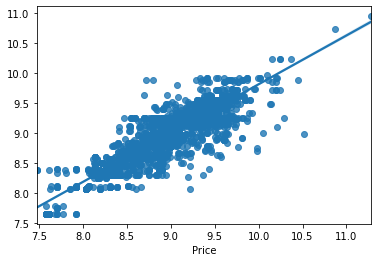

In [49]:
sns.regplot(y_test,pred)